### 기본 설정

In [1]:
import pandas as pd
import numpy as np
#from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')

In [3]:
shop = pd.read_csv('shop_seoul_202009.txt', sep='|')
shop.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
3,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249
4,19993199,고려대학교교육관쎄리오점,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1129012500100010002039525,고려대학교안암캠퍼스(인문사회계),서울특별시 성북구 안암로 145,136701,2841.0,NaN,1,32,127.031702,37.588485


In [6]:
#투썸플레이스만 추출
df = shop[shop['상호명'].str.contains('투썸|twosome|Twosome')]
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1072,19940228,투썸플레이스충정로역,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1141010200100630001030846,삼창빌딩,서울특별시 서대문구 충정로 13,120837,3737.0,NaN,1,NaN,126.962600,37.560560
1398,20306529,투썸플레이스압구정51케이,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700106020000000001,NaN,서울특별시 강남구 압구정로30길 45,135893,6022.0,NaN,1,NaN,127.029386,37.524338
1421,20293800,투썸플레이스가산대성디폴리스점,가산대성디폴리스점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1154510100104890007014247,대성디폴리스지식산업센터,서울특별시 금천구 서부샛길 606,153719,8504.0,D,3,NaN,126.876996,37.479945
1726,20578779,투썸플레이스코엑스메가박스점,코엑스메가박스점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010500101590000017116,코엑스인터콘티넨탈서울,서울특별시 강남구 영동대로 513,135798,6164.0,NaN,1,NaN,127.057100,37.512939
8674,19977178,투썸플레이스,예금보험공사점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114010200100330000018832,예금보험공사,서울특별시 중구 청계천로 30,100180,4521.0,NaN,1,NaN,126.980783,37.568495


In [10]:
df.shape
#서울에 총 286개의 매장이 있음

(286, 39)

In [11]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [12]:
df = df[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', 
         '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도',
       '시군구명', '행정동명'],
      dtype='object')

In [13]:
df['위도'] = df['위도'].astype(float)
df['경도'] = df['경도'].astype(float)

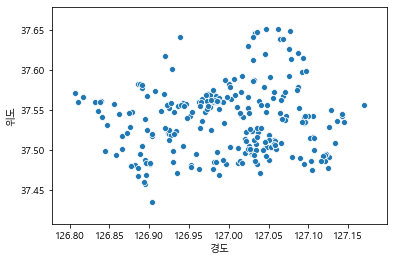

In [15]:
sns.scatterplot(data=df, x='경도', y='위도')

In [36]:
map = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=10)

for n in df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = df.loc[n, '상호명'] + ' - ' + df.loc[n, '도로명주소']
       
    folium.CircleMarker(
        location = [df.loc[n,'위도'], df.loc[n, '경도']],
        radius = 3,
        popup = popup_name,
        color = 'purple'
    ).add_to(map)

map

#### 구별 점포수

In [21]:
df.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     46
강동구      7
강북구      4
강서구     13
관악구      7
광진구     11
구로구     10
금천구     11
노원구      7
도봉구      4
동대문구     9
동작구      4
마포구     15
서대문구    10
서초구     23
성동구     12
성북구      5
송파구     12
양천구      4
영등포구    13
용산구      7
은평구      3
종로구     14
중구      27
중랑구      8
Name: 상호명, dtype: int64

In [23]:
import json

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

In [24]:
df_temp = df.groupby(['시군구명'])['상호명'].count()
df_twosome = pd.DataFrame(df_temp)
df_twosome.columns = ['매장수']
df_twosome.head()

,매장수
시군구명,
강남구,46
강동구,7
강북구,4
강서구,13
관악구,7


In [35]:
map = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = geo_json,
               data = df_twosome['매장수'],
               columns = [df_twosome.index, df_twosome['매장수']],
               fill_color = 'YlGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = df.loc[n, '상호명'] + ' - ' + df.loc[n, '도로명주소']
            
    folium.CircleMarker(
        location=[df.loc[n,'위도'], df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= 'purple',
    ).add_to(map)
    
map

가장 매장이 많은 강남구가 진하게 표현되었다.